In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pickle
import matplotlib.pyplot as plt


In [13]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=4 * 4 * 512))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
with open('vggfeatures.h5', 'rb') as f:
    features = pickle.load(f)
with open('vgglabels.h5', 'rb') as f:
    labels = pickle.load(f)
with open('vggfeatures_test.h5', 'rb') as f:
    features_test = pickle.load(f)
with open('vgglabels_test.h5', 'rb') as f:
    labels_test = pickle.load(f)    

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1048833 (4.00 MB)
Trainable params: 1048833 (4.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(features, labels, epochs=30, batch_size=50, validation_data=(features_test, labels_test))

Epoch 1/30
40/40 [==============================] - 1s 18ms/step - loss: 0.4775 - accuracy: 0.7885 - val_loss: 0.3180 - val_accuracy: 0.8671
Epoch 2/30
40/40 [==============================] - 1s 13ms/step - loss: 0.2634 - accuracy: 0.8935 - val_loss: 0.2839 - val_accuracy: 0.8714
Epoch 3/30
40/40 [==============================] - 1s 13ms/step - loss: 0.2003 - accuracy: 0.9205 - val_loss: 0.3310 - val_accuracy: 0.8629
Epoch 4/30
40/40 [==============================] - 1s 13ms/step - loss: 0.1485 - accuracy: 0.9415 - val_loss: 0.3186 - val_accuracy: 0.8750
Epoch 5/30
40/40 [==============================] - 1s 13ms/step - loss: 0.1386 - accuracy: 0.9510 - val_loss: 0.2925 - val_accuracy: 0.8829
Epoch 6/30
40/40 [==============================] - 1s 14ms/step - loss: 0.0992 - accuracy: 0.9705 - val_loss: 0.3018 - val_accuracy: 0.8829
Epoch 7/30
40/40 [==============================] - 1s 13ms/step - loss: 0.0976 - accuracy: 0.9635 - val_loss: 0.3499 - val_accuracy: 0.8707
Epoch 8/30
40

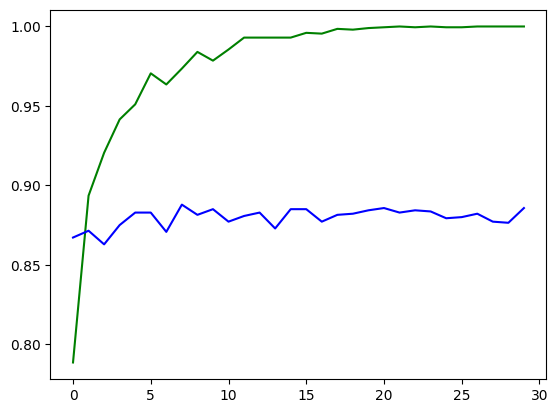

In [20]:
epochs = range(30)
plt.plot(epochs, history.history['accuracy'], color='green')
plt.plot(epochs, history.history['val_accuracy'], color='blue')